# Sequential probability ratio testing <font color='red'>(SPRT)</font>



SPRT is based on the likelihood ratio statistic.

We focus on conditional SPRT for this challenge.

__General steps of conditional SPRT__

1. Set statistical parameters (alpha, beta, odd ratio)
2. Calculate critical upper and lower decision boundaries a & b
<img src="Capture.png">
3. Then for each trail(observation) compute
Then for each trail(observation) compute
- calculate test statistics(likelihood ratio) as S
- calculate upper and lower limits for exposed group
- apply stopping rule

__Stopping Rule__

1. If the log probability ratio greater than or equal to the upper critical limit then the model reject the null hypothesis with the favor of alternative hypothesis (i.e. accept H1 (conclude that version two is better than version one)) and terminate the test.
    - Si >= b : accept H1
2. If the log probability ratio less than or equal to the lower critical limit then accept the null hypothesis (i.e. conclude that there is no difference between the two groups) and terminate the test.
    - Si <= a : accept H0
3. If neither critical limit is reached, conduct another trial and continue the test.
    - a < Si b : continue
<img src="Capture2.png">


# Python implementation for conditional SPRT

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from helper import MyHelper
import utility
import plots

import seaborn as sb
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import statsmodels.stats.api as sms
sns.set()

In [3]:
CSV_PATH = "../data/AdSmartABdata.csv"

In [4]:
# Fetching data
Helper = MyHelper()

data_frame = Helper.read_csv(CSV_PATH)

>> file read as csv


In [5]:
data_frame.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
exposed_yes = data_frame.query('experiment == "exposed"').yes
exposed_count = len(exposed_yes)
exposed_yes_count = exposed_yes.sum(axis=0)

control_yes = data_frame.query('experiment == "control"').yes
control_count = len(control_yes)
control_yes_count = control_yes.sum(axis=0)

print('Converted Control:',control_yes_count/control_count,'    Total Control:',control_count)
print('Converted Exposed:',exposed_yes_count/exposed_count,'    Total Exposed:',exposed_count)

Converted Control: 0.06484893146647015     Total Control: 4071
Converted Exposed: 0.07688467299051423     Total Exposed: 4006


In [7]:
# SPRT 
# Binomial Endpoints

import sprt as sprt
import numpy as np

# Null value
h0 = control_yes_count/control_count
# Alternative value
h1 = exposed_yes_count/exposed_count
# Type I error rate = 0.05
alpha = 0.05
# Type II error rate = 0.2
beta = 0.2
# Values
values = np.random.binomial(1, h1, 100)
test = sprt.SPRTBinomial(h0 = h0, h1 = h1, alpha = alpha, beta = beta, values = values)


Decision:	Continue

     values  lower   upper
n                         
91       12 -2.071  21.569
92       12 -2.000  21.639
93       12 -1.929  21.710
94       12 -1.858  21.781
95       12 -1.788  21.852
96       12 -1.717  21.922
97       12 -1.646  21.993
98       12 -1.576  22.064
99       12 -1.505  22.134
100      12 -1.434  22.205


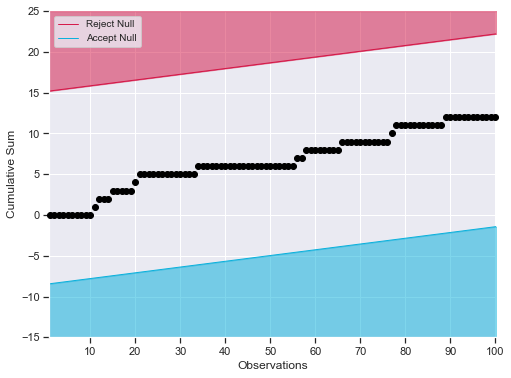

In [8]:
test.plot()

In [9]:
## we cannot stop the test at this point, we have to proceed